# Examining the difference in spike counts between drifting and static gratings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [3]:
id = 750332458
session = cache.get_session_data(id)

/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/envs/allensdk/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Getting the table for static and drifting

In [4]:
table_static = session.get_stimulus_table("static_gratings")

table_static.head()

,stimulus_block,start_time,stop_time,spatial_frequency,stimulus_name,contrast,size,phase,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,0.04,static_gratings,0.8,"[250.0, 250.0]",0.25,0.0,0.250209,4787
49435,8.0,5399.083416,5399.333625,0.32,static_gratings,0.8,"[250.0, 250.0]",0.0,0.0,0.250209,4788
49436,8.0,5399.333625,5399.583834,0.04,static_gratings,0.8,"[250.0, 250.0]",0.0,30.0,0.250209,4789
49437,8.0,5399.583834,5399.834042,0.08,static_gratings,0.8,"[250.0, 250.0]",0.75,90.0,0.250209,4790
49438,8.0,5399.834042,5400.084249,0.08,static_gratings,0.8,"[250.0, 250.0]",0.25,60.0,0.250206,4791


In [5]:
table_drifting = session.get_stimulus_table("drifting_gratings")

table_drifting.head()

,stimulus_block,start_time,stop_time,spatial_frequency,stimulus_name,contrast,size,temporal_frequency,phase,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1585.647748,1587.649398,0.04,drifting_gratings,0.8,"[250.0, 250.0]",4.0,"[21235.93333333, 21235.93333333]",180.0,2.00165,246
3799,2.0,1588.650242,1590.651902,0.04,drifting_gratings,0.8,"[250.0, 250.0]",4.0,"[21235.93333333, 21235.93333333]",225.0,2.00166,247
3800,2.0,1591.652728,1593.654418,0.04,drifting_gratings,0.8,"[250.0, 250.0]",2.0,"[21235.93333333, 21235.93333333]",135.0,2.00169,248
3801,2.0,1594.655252,1596.656912,0.04,drifting_gratings,0.8,"[250.0, 250.0]",2.0,"[21235.93333333, 21235.93333333]",0.0,2.00166,249
3802,2.0,1597.657758,1599.659418,0.04,drifting_gratings,0.8,"[250.0, 250.0]",15.0,"[21235.93333333, 21235.93333333]",315.0,2.00166,250


### Desigining a spike count function

the function

In [6]:
def get_spike(session, stimuli, ecephys_structure_acronym):

    table = session.get_stimulus_table(stimuli)


    stimulus_presentation_ids = table.index.values
    unit_ids = session.units[session.units["ecephys_structure_acronym"] == ecephys_structure_acronym].index.values

    spike_counts = session.conditionwise_spike_statistics(
        stimulus_presentation_ids=stimulus_presentation_ids,
        unit_ids =unit_ids,
    )
 
    return spike_counts

In [41]:
def get_spike(session, stimuli, ecephys_structure_acronym):
    table = session.get_stimulus_table(stimuli)

    # Filter for orientation = 0
    if "orientation" not in table.columns:
        raise ValueError("The stimulus table does not contain an 'orientation' column.")

    filtered_table = table[table["orientation"] == 0]
    stimulus_presentation_ids = filtered_table.index.values

    unit_ids = session.units[session.units["ecephys_structure_acronym"] == ecephys_structure_acronym].index.values

    spike_counts = session.conditionwise_spike_statistics(
        stimulus_presentation_ids=stimulus_presentation_ids,
        unit_ids=unit_ids,
    )

    return spike_counts


In [42]:
static_spike_counts = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="VISam")

static_spike_counts



,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,4787,21,49,0.428571,1.040833,0.148690
951819532,4787,35,49,0.714286,0.707107,0.101015
951819541,4787,86,49,1.755102,1.774009,0.253430
951819550,4787,41,49,0.836735,1.650088,0.235727
951819732,4787,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...,...
951820825,4900,3,48,0.062500,0.244623,0.035308
951820832,4900,5,48,0.104167,0.308709,0.044558
951820847,4900,7,48,0.145833,0.356674,0.051481


In [43]:
drifting_spike_counts = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="VISam")

drifting_spike_counts

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,249,191,15,12.733333,13.106523,3.384090
951819532,249,286,15,19.066667,13.295900,3.432987
951819541,249,90,15,6.000000,8.383658,2.164651
951819550,249,42,15,2.800000,2.730777,0.705084
951819732,249,708,15,47.200000,16.644175,4.297508
...,...,...,...,...,...,...
951820825,270,2,15,0.133333,0.351866,0.090851
951820832,270,5,15,0.333333,0.617213,0.159364
951820847,270,18,15,1.200000,1.740279,0.449338


Immediately we notice that there are approx. 3x as many units identified for static gratings than drifting gratings. 

(??? How is it that for a session we only have around 60 units in VISam but then there are )

### Analyzing the spike means to see how much units get activated when encountering single stimulus

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [45]:
drifting_spike_counts_unind = drifting_spike_counts.reset_index(level='stimulus_condition_id', drop=True)
static_spike_counts_unind= static_spike_counts.reset_index(level='stimulus_condition_id', drop=True)

static_spike_counts_unind

,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,21,49,0.428571,1.040833,0.148690
951819532,35,49,0.714286,0.707107,0.101015
951819541,86,49,1.755102,1.774009,0.253430
951819550,41,49,0.836735,1.650088,0.235727
951819732,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...
951820825,3,48,0.062500,0.244623,0.035308
951820832,5,48,0.104167,0.308709,0.044558
951820847,7,48,0.145833,0.356674,0.051481


Begin by looking at overlapping units activated by both static and drifting gratings stimuli.

In [46]:
n_overlap = len(set(drifting_spike_counts_unind.index) & set(static_spike_counts_unind.index))
print("Overlapping unit_ids:", n_overlap)

drifting_spike_counts_mean = drifting_spike_counts_unind.groupby("unit_id").mean()
static_spike_counts_mean = static_spike_counts_unind.groupby("unit_id").mean()

print(drifting_spike_counts_mean.shape)

drifting_spike_counts_mean.head()



Overlapping unit_ids: 60
(60, 5)


,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,205.8,15.0,13.720000,12.147498,3.136471
951819532,280.8,15.0,18.720000,12.813780,3.308504
951819541,211.6,15.0,14.106667,10.910286,2.817024
951819550,83.0,15.0,5.533333,7.451725,1.924027
951819732,873.2,15.0,58.213333,22.984037,5.934453


In [47]:
merged_spikes = static_spike_counts_mean.merge(drifting_spike_counts_mean, left_index=True, right_index=True, how="inner", suffixes=('_static', '_drifting'))

merged_spikes.head()

,spike_count_static,stimulus_presentation_count_static,spike_mean_static,spike_std_static,spike_sem_static,spike_count_drifting,stimulus_presentation_count_drifting,spike_mean_drifting,spike_std_drifting,spike_sem_drifting
unit_id,,,,,,,,,,
951819523,30.00,48.2,0.623403,0.983294,0.141736,205.8,15.0,13.720000,12.147498,3.136471
951819532,31.40,48.2,0.651170,0.869497,0.125280,280.8,15.0,18.720000,12.813780,3.308504
951819541,111.70,48.2,2.318143,1.818243,0.261901,211.6,15.0,14.106667,10.910286,2.817024
951819550,56.35,48.2,1.170070,1.695487,0.244294,83.0,15.0,5.533333,7.451725,1.924027
951819732,247.90,48.2,5.137689,2.465238,0.355109,873.2,15.0,58.213333,22.984037,5.934453


We check if there is a difference in the mean number of spikes per presentation for these overlapping units.

       spike_mean_static  spike_mean_drifting
count          60.000000            60.000000
mean            1.972516            17.666889
std             2.061834            19.716786
min             0.063527             0.346667
25%             0.289514             5.346667
50%             1.072736             8.740000
75%             3.176288            25.156667
max             7.228929            92.360000


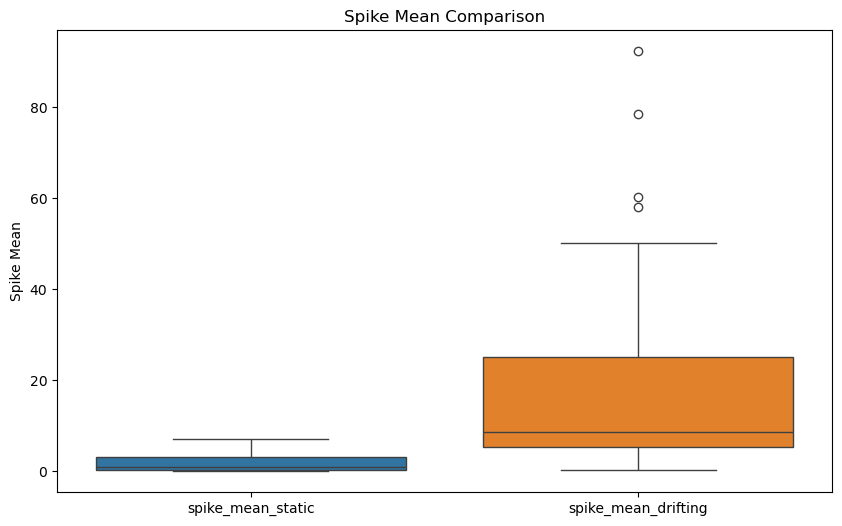

In [48]:
# Summary statistics
print(merged_spikes[['spike_mean_static', 'spike_mean_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes[['spike_mean_static', 'spike_mean_drifting']])
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()



In [49]:
merged_spikes

,spike_count_static,stimulus_presentation_count_static,spike_mean_static,spike_std_static,spike_sem_static,spike_count_drifting,stimulus_presentation_count_drifting,spike_mean_drifting,spike_std_drifting,spike_sem_drifting
unit_id,,,,,,,,,,
951819523,30.00,48.2,0.623403,0.983294,0.141736,205.8,15.0,13.720000,12.147498,3.136471
951819532,31.40,48.2,0.651170,0.869497,0.125280,280.8,15.0,18.720000,12.813780,3.308504
951819541,111.70,48.2,2.318143,1.818243,0.261901,211.6,15.0,14.106667,10.910286,2.817024
951819550,56.35,48.2,1.170070,1.695487,0.244294,83.0,15.0,5.533333,7.451725,1.924027
951819732,247.90,48.2,5.137689,2.465238,0.355109,873.2,15.0,58.213333,22.984037,5.934453
951819744,152.60,48.2,3.160727,2.208928,0.318126,570.2,15.0,38.013333,17.281920,4.462173
951819769,114.65,48.2,2.380404,1.678874,0.241926,128.8,15.0,8.586667,6.065304,1.566055
951819775,64.85,48.2,1.346998,1.458745,0.210228,112.8,15.0,7.520000,4.595106,1.186451
951819801,124.95,48.2,2.595008,2.101446,0.302950,377.2,15.0,25.146667,13.902244,3.589544


       spike_mean_static  spike_mean_drifting
count          60.000000            60.000000
mean            1.972516            17.666889
std             2.061834            19.716786
min             0.063527             0.346667
25%             0.289514             5.346667
50%             1.072736             8.740000
75%             3.176288            25.156667
max             7.228929            92.360000


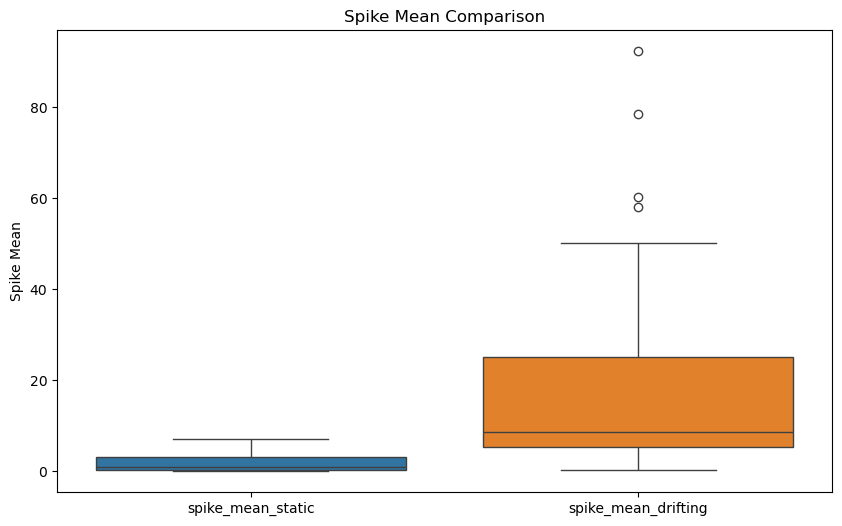

In [50]:
# Summary statistics
print(merged_spikes[['spike_mean_static', 'spike_mean_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes[['spike_mean_static', 'spike_mean_drifting']])
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()



### Hypothesis testing 

H0: there is no difference in mean number of spikes between drifting and static gratings

In [14]:
# Shapiro-Wilk test for normality

merged_spikes['diff'] = merged_spikes['spike_mean_drifting'] - merged_spikes['spike_mean_static']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes['diff'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences are normally distributed (fail to reject H0)")
else:
    print("Differences are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences are NOT normally distributed (reject H0)


In [15]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = merged_spikes[['spike_mean_drifting', 'spike_mean_static']]
y = np.where(merged_spikes['spike_mean_drifting'] > merged_spikes['spike_mean_static'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Classification Accuracy: 1.000 ± 0.000


No we do the same investigation with the spike coefficient of variation (CV=std/mean) to see if the variability is also greater for drifting gratings.

       spike_CV_static  spike_CV_drifting
count        60.000000          60.000000
mean          1.492445           0.808242
std           1.066668           0.410285
min           0.329193           0.250722
25%           0.691951           0.455950
50%           1.154126           0.713168
75%           2.106592           1.048522
max           4.779069           1.895985


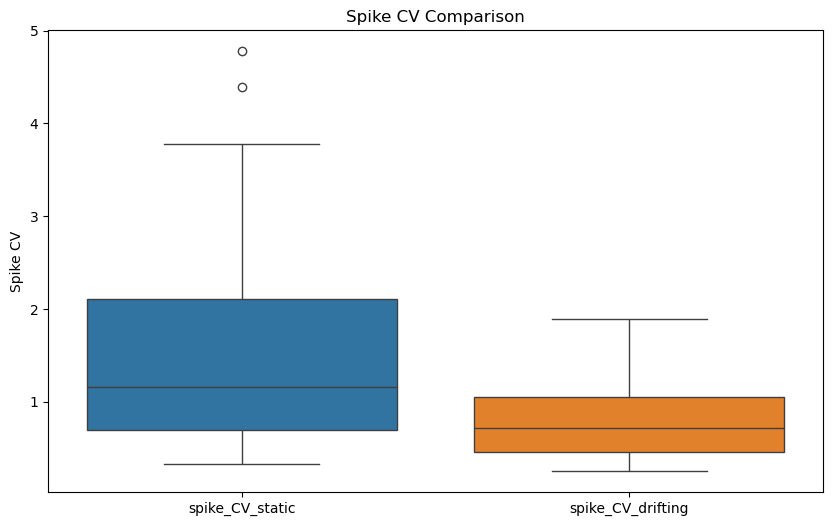

In [52]:
merged_spikes_var = merged_spikes.copy()

# Calculate the coefficient of variation (CV) for static and drifting conditions
merged_spikes_var['spike_CV_static'] = merged_spikes_var['spike_std_static'] / merged_spikes_var['spike_mean_static']
merged_spikes_var['spike_CV_drifting'] = merged_spikes_var['spike_std_drifting'] / merged_spikes_var['spike_mean_drifting']

# Summary statistics
print(merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']])
plt.title('Spike CV Comparison')
plt.ylabel('Spike CV')
plt.show()


We see that CV is if anything higher for static gratings suggesting a higher variability in static gratings. We again verify if the pairwise differences are normally distributed.

H0: There is no difference between the CV of static and drifting spikes for overlapping units

In [53]:
# Shapiro-Wilk test for normality

merged_spikes_var['diff_CV'] = merged_spikes_var['spike_CV_static'] - merged_spikes_var['spike_CV_drifting']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes_var['diff_CV'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences in CV are normally distributed (fail to reject H0)")
else:
    print("Differences in CV are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences in CV are NOT normally distributed (reject H0)


In [54]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes_var['spike_CV_static'], merged_spikes_var['spike_CV_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [55]:
X = merged_spikes_var[['spike_CV_static', 'spike_CV_drifting']]
y = np.where(merged_spikes_var['spike_CV_static'] > merged_spikes_var['spike_CV_drifting'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

del merged_spikes_var #Delete this to free up space

Classification Accuracy: 0.933 ± 0.033


We conclude that in fact the Coefficient of Variation (CV) is in fact higher for static gratings than drifting gratings. This difference is also statistically significant and can be used to classify the two effectively.

So far we have investigated differences in overlapping units, which are only 60 (a huge minority) so we look at all for the sake of completeness.

### ???just unique ones???

            count       mean        std       min       25%      50%  \
condition                                                              
drifting    300.0  17.666889  20.698727  0.066667  4.316667  9.00000   
static     1200.0   1.972516   2.272730  0.000000  0.296321  1.03087   

                75%         max  
condition                        
drifting   23.85000  112.000000  
static      2.69594   12.244898  


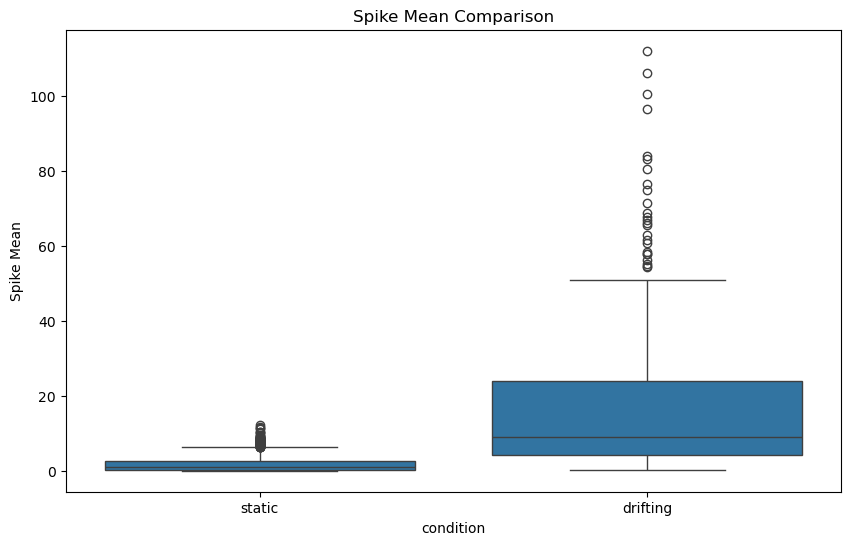

In [56]:
# Directly extract spike_mean values from each dataframe
static_means = static_spike_counts['spike_mean']
drifting_means = drifting_spike_counts['spike_mean']

data = pd.concat([
    pd.DataFrame({'spike_mean': static_means, 'condition': 'static'}),
    pd.DataFrame({'spike_mean': drifting_means, 'condition': 'drifting'})
], ignore_index=True)

# Display summary statistics if desired
print(data.groupby('condition')['spike_mean'].describe())

# Boxplot comparing spike_mean for static vs drifting
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='spike_mean', data=data)
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()

In [57]:
# Perform a two-sided Mann-Whitney U test
u_stat, p_val = stats.mannwhitneyu(static_means, drifting_means, alternative="two-sided")
print(f"Mann-Whitney U test statistic: {u_stat}")
print(f"Mann-Whitney U test p-value: {p_val:.4f}")

Mann-Whitney U test statistic: 47408.5
Mann-Whitney U test p-value: 0.0000


The Mann-Whitney U test (a non-parametric test) reveals that the spike_mean is higher for drifting gratings than static gratings for all stimuli.

##Unit features

In [58]:
session.units.head()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951817231,0.293351,101.641410,0.001248,8,392.48,6.461795,15.773666,0.020093,147.423046,0.000259,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.968724,1249.998697,True
951817222,1.427508,74.654970,0.032535,7,948.33,5.638511,6.423025,0.007457,95.080849,0.000727,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.968724,1249.998697,True
951817272,0.240866,182.350545,0.000218,13,578.80,4.865528,25.891454,0.002123,121.137882,0.017477,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.968724,1249.998697,True
951817282,0.650177,183.182025,0.000223,14,545.47,4.402664,9.177656,0.001370,59.655811,0.025102,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.968724,1249.998697,True
951817316,0.387017,71.279130,0.059431,18,446.09,3.582546,10.277127,0.050247,56.080395,0.021113,...,8.0,grey,NaN,NaN,NaN,probeA,See electrode locations,29999.968724,1249.998697,True


In [24]:
session.units.shape

(902, 40)

In [25]:
session.units.describe()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,ecephys_structure_id,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_sampling_rate,probe_lfp_sampling_rate
count,902.000000,902.000000,902.000000,902.000000,902.000000,894.000000,902.000000,902.000000,894.000000,898.000000,...,902.000000,902.000000,9.020000e+02,902.000000,9.020000e+02,87.000000,87.000000,87.000000,902.000000,902.000000
mean,0.623241,169.446619,0.019825,243.089800,189.782339,4.610472,8.326600,0.083993,72.812595,0.009804,...,162.546563,33.421286,7.579046e+08,1640.133038,1.250287e+06,8594.551724,2600.816092,8982.344828,29999.978516,1249.999105
std,1.181052,84.318945,0.026266,156.315873,125.609017,1.494826,8.001008,0.110792,43.678669,0.018814,...,99.089795,20.497473,5.097220e+00,990.756829,2.653391e+07,335.528142,709.201738,428.637371,0.038109,0.001588
min,0.001206,26.217945,0.000001,1.000000,0.000000,1.561927,0.060227,0.000000,15.259453,0.000000,...,0.000000,11.000000,7.579045e+08,20.000000,8.000000e+00,7905.000000,1628.000000,8088.000000,29999.918181,1249.996591
25%,0.348596,110.435764,0.000907,104.000000,108.057500,3.579720,2.788412,0.007407,52.019567,0.000797,...,57.000000,11.000000,7.579045e+08,580.000000,8.000000e+00,8291.500000,1933.000000,8605.500000,29999.968724,1249.998697
50%,0.490858,152.112968,0.006089,230.500000,158.445000,4.321807,6.426097,0.036439,65.496393,0.003468,...,194.500000,27.000000,7.579046e+08,1960.000000,8.000000e+00,8726.000000,2411.000000,9145.000000,29999.996461,1249.999853
75%,0.611383,203.744239,0.030318,374.000000,237.327500,5.332017,11.135852,0.115025,82.487530,0.010959,...,253.000000,59.000000,7.579046e+08,2540.000000,3.940000e+02,8895.000000,3251.000000,9367.000000,29999.998841,1249.999952
max,27.928935,815.083815,0.098050,588.000000,1204.970000,13.264243,66.261032,0.499259,955.443973,0.256621,...,322.000000,59.000000,7.579046e+08,3240.000000,5.638074e+08,8991.000000,4027.000000,9477.000000,30000.040445,1250.001685


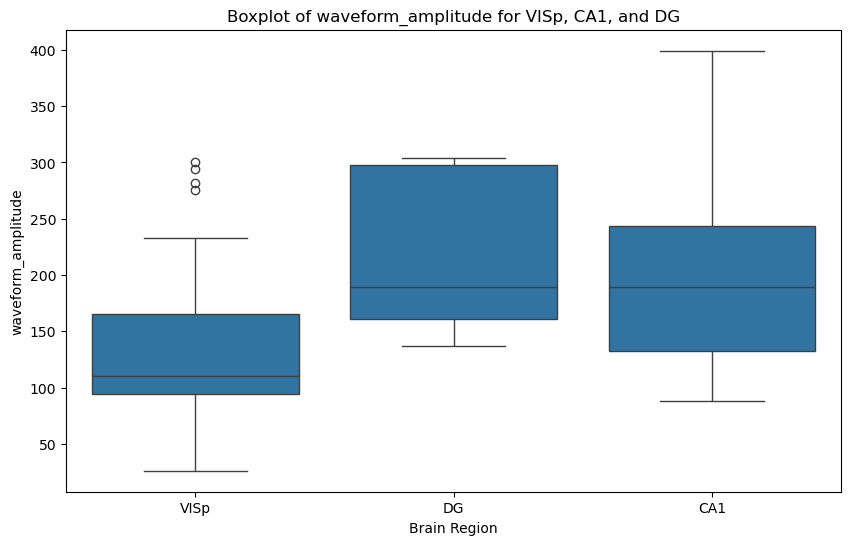

In [59]:
import seaborn as sns

def plot_3region_boxplot(session, column_name, region1, region2, region3):
    """
    Create a boxplot for a specified unit feature in session.units comparing three brain regions.
    
    Parameters:
    - session: the AllenSDK session object.
    - column_name: str, the name of the column in session.units to plot (e.g., 'waveform_PT_ratio').
    - region1: str, the first brain region to include (e.g., 'VISp').
    - region2: str, the second brain region to include (e.g., 'CA1').
    - region3: str, the third brain region to include.
    
    The function filters session.units to include only units in the specified regions, then plots the boxplot.
    """
    # List of chosen regions
    regions = [region1, region2, region3]
    
    # Filter units for the specified brain regions
    units = session.units
    filtered_units = units[units['ecephys_structure_acronym'].isin(regions)]
    
    # Check if the column exists
    if column_name not in filtered_units.columns:
        raise ValueError(f"Column '{column_name}' not found in session.units.")
    
    # Create a DataFrame for plotting
    plot_df = filtered_units[['ecephys_structure_acronym', column_name]].copy()
    plot_df = plot_df.rename(columns={'ecephys_structure_acronym': 'Brain Region',
                                      column_name: 'Metric'})
    
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Brain Region', y='Metric', data=plot_df)
    plt.title(f'Boxplot of {column_name} for {region1}, {region2}, and {region3}')
    plt.ylabel(column_name)
    plt.xlabel('Brain Region')
    plt.show()

plot_3region_boxplot(session, "waveform_amplitude", "VISp", "CA1", "DG")

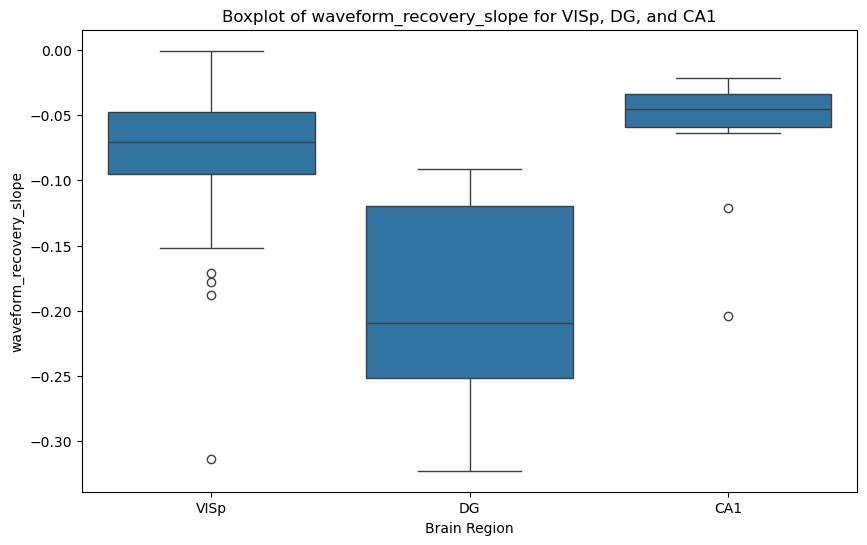

In [27]:
plot_3region_boxplot(session, "waveform_recovery_slope", "VISp", "DG", "CA1")

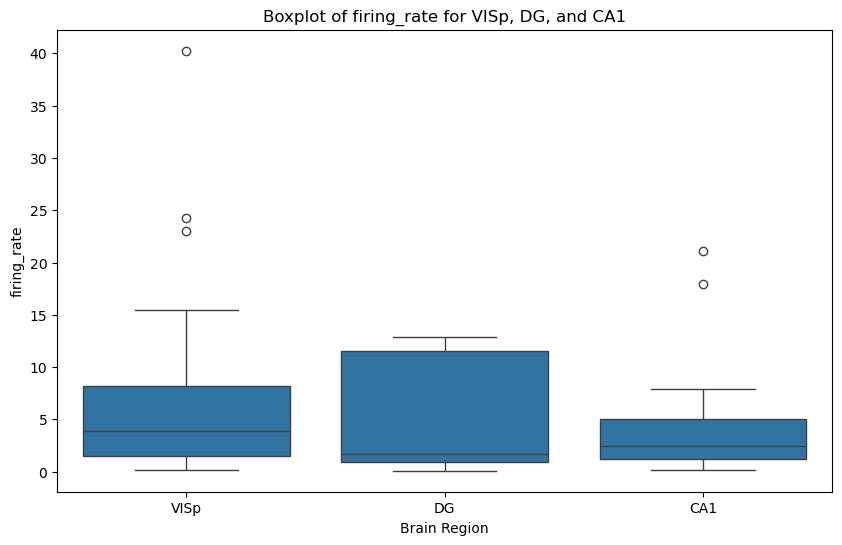

In [28]:
plot_3region_boxplot(session, "firing_rate", "VISp", "DG", "CA1")

We find some promising suggestions of subtle differences in the features between units of different regions. These boxplots seem to suggest slight differences in a variety of different features such as wave_form_amplitude and recovery_slope. Moreover it seems the differences are very minor between 'VISam' and 'VISp' (two regions in the visual cortex). Whereas between 'VISp' and 'CA1', regions in two different cortex's the difference is more pronounced. 

We test this idea further by investigating with Mann-Whitney test if there is a difference in distribution of features between brain regions. We use this as it does not require normality (non-parametric) and it measures not just the mean but is also sensitive to median and distribution shape.

###Hypothesis testing

H0: The probability of an observation of a unit being greater (or lower than) a unit in another region is 0.5

In [29]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

def mann_whitney_multiple_features(session, features, region1, region2, alpha=0.05):
    """
    Perform Mann-Whitney U tests for a list of features comparing two brain regions,
    and apply Bonferroni correction for multiple comparisons.

    Parameters:
    - session: the AllenSDK session object.
    - features: list of strings, the names of columns in session.units to test.
    - region1: str, first brain region (e.g., 'VISp').
    - region2: str, second brain region (e.g., 'CA1').
    - alpha: significance level for testing (default 0.05).

    Returns:
    - A DataFrame with feature name, U statistic, raw p-value, and Bonferroni-corrected p-value.
    """
    # Filter units for the two specified regions
    units = session.units
    filtered_units = units[units['ecephys_structure_acronym'].isin([region1, region2])]
    
    # List to store test results
    results = []
    
    # Loop over each feature of interest
    for feature in features:
        if feature not in filtered_units.columns:
            print(f"Warning: Feature '{feature}' not found in session.units. Skipping.")
            continue
        
        # Get feature values for each region
        values_region1 = filtered_units.loc[filtered_units['ecephys_structure_acronym'] == region1, feature]
        values_region2 = filtered_units.loc[filtered_units['ecephys_structure_acronym'] == region2, feature]
        
        # Perform the Mann-Whitney U test (two-sided)
        u_stat, p_val = stats.mannwhitneyu(values_region1, values_region2, alternative='two-sided')
        
        results.append({'Feature': feature,
                        'U_statistic': u_stat,
                        'p_value': p_val})
    
    results_df = pd.DataFrame(results)
    
    # Number of tests (features)
    m = len(results_df)
    
    # Apply Bonferroni correction manually: multiply p-values by number of tests (cap at 1.0)
    results_df['p_value_bonf'] = np.minimum(results_df['p_value'] * m, 1.0)
    
    # Optionally, indicate significance at the provided alpha level
    results_df['Significant'] = results_df['p_value_bonf'] < alpha
    
    return results_df

features_to_test = ['waveform_PT_ratio', 'waveform_amplitude', 'firing_rate', 'waveform_recovery_slope']
results = mann_whitney_multiple_features(session, features_to_test, 'VISp', 'CA3', alpha=0.05)
print(results)

                   Feature  U_statistic   p_value  p_value_bonf  Significant
0        waveform_PT_ratio        463.0  0.909155      1.000000        False
1       waveform_amplitude        329.0  0.069832      0.279329        False
2              firing_rate        282.0  0.016002      0.064007        False
3  waveform_recovery_slope        629.0  0.047950      0.191798        False


In [30]:
results = mann_whitney_multiple_features(session, features_to_test, 'VISp', 'DG', alpha=0.05)
print(results)

                   Feature  U_statistic   p_value  p_value_bonf  Significant
0        waveform_PT_ratio        196.0  0.645334      1.000000        False
1       waveform_amplitude         70.0  0.001951      0.007804         True
2              firing_rate        242.0  0.687259      1.000000        False
3  waveform_recovery_slope        402.0  0.000075      0.000302         True


In [ ]:
static_spike_counts_DG = get_spike(session, stimuli="static_gratings", ecephys_structure_acronym="DG")
drifting_spike_counts_DG = get_spike(session, stimuli="drifting_gratings", ecephys_structure_acronym="DG")

In [33]:
static_spike_counts_DG.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951809351,4787,114,49,2.326531,2.034983,0.290712
951809393,4787,163,49,3.326531,2.718668,0.388381
951809399,4787,6,49,0.122449,0.439349,0.062764
951809406,4787,0,49,0.000000,0.000000,0.000000
951809436,4787,129,49,2.632653,2.522349,0.360336


In [34]:
drifting_spike_counts_DG.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951809351,246,459,15,30.600000,8.575713,2.214240
951809393,246,268,15,17.866667,14.451232,3.731292
951809399,246,103,15,6.866667,5.642526,1.456894
951809406,246,42,15,2.800000,4.229151,1.091962
951809436,246,422,15,28.133333,15.505145,4.003411


In [37]:
static_spike_counts_VISp = get_spike(session, stimuli="static_gratings", ecephys_structure_acronym="VISp")
drifting_spike_counts_VISp = get_spike(session, stimuli="drifting_gratings", ecephys_structure_acronym="VISp")


In [38]:
static_spike_counts_VISp.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951814973,4787,26,49,0.530612,1.634294,0.233471
951814989,4787,14,49,0.285714,0.540062,0.077152
951815078,4787,62,49,1.265306,0.884485,0.126355
951815103,4787,7,49,0.142857,0.408248,0.058321
951815110,4787,25,49,0.510204,0.868966,0.124138


In [39]:
drifting_spike_counts_VISp.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951814973,246,54,15,3.600000,7.048809,1.819995
951814989,246,32,15,2.133333,2.614975,0.675184
951815078,246,150,15,10.000000,8.912271,2.301138
951815103,246,18,15,1.200000,1.971222,0.508967
951815110,246,17,15,1.133333,2.065591,0.533333
